# Model Klasifikasi Multi-Kelas Logistic Regression untuk Prediksi Penyakit Jantung

Notebook ini menunjukkan implementasi **Logistic Regression** menggunakan pustaka `scikit-learn` dan `mglearn` untuk memprediksi tahap penyakit jantung berdasarkan fitur yang tersedia.

Model ini akan dievaluasi menggunakan metrik berikut:

- **Akurasi**
- **Presisi (macro & weighted)**
- **Recall (macro & weighted)**
- **F1-Score (macro & weighted)**
- **AUC (Area Under Curve) untuk setiap kelas**
- **ROC (Receiver Operating Characteristic Curve) multi-kelas**

Selain itu, setiap rumus yang digunakan akan dijelaskan secara matematis.


In [1]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 16.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import mglearn

# Mengatur gaya tampilan grafik
sns.set_style("whitegrid")


## 1. Memuat dan Menampilkan Dataset

Kita akan memuat dataset dan melihat struktur datanya.


In [3]:
# Memuat dataset
df = pd.read_csv("HeartDisease.csv")

# Menampilkan 5 baris pertama
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


## 2. Pra-pemrosesan Data

Agar model dapat bekerja dengan baik, kita melakukan beberapa langkah berikut:
- Menghapus nilai yang hilang (NaN)


In [4]:
# Menghapus nilai NaN jika ada
df.dropna(inplace=True)

# Menampilkan jumlah data setelah pembersihan
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


## 3. Memisahkan Data Latih dan Data Uji

Kita akan membagi dataset menjadi **data latih (80%)** dan **data uji (20%)**.


In [8]:
# Mendefinisikan fitur dan target untuk multi-kelas
X = df.drop(columns=["num"])
y = df["num"]

# Membagi dataset menjadi 80% latih dan 20% uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menampilkan jumlah data per kelas setelah pembagian
print("Distribusi kelas dalam data latih:\n", y_train.value_counts())
print("Distribusi kelas dalam data uji:\n", y_test.value_counts())


Distribusi kelas dalam data latih:
 num
0    128
1     43
3     28
2     28
4     10
Name: count, dtype: int64
Distribusi kelas dalam data uji:
 num
0    32
1    11
3     7
2     7
4     3
Name: count, dtype: int64


## 4. Melatih Model Logistic Regression

Model logistic regression akan dipelajari berdasarkan data latih yang telah dibagi sebelumnya.


In [9]:
# Inisialisasi dan pelatihan model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Menampilkan koefisien model
print("Koefisien model:", model.coef_)
print("Intercept model:", model.intercept_)


Koefisien model: [[ 3.74809688e-02 -5.16764219e-01 -2.56638710e-01 -8.60646856e-03
  -1.06622366e-03  2.55223811e-01 -3.41950777e-01  3.48547576e-02
  -3.97442139e-01 -5.35031409e-01 -1.73816053e-01 -1.04021238e+00
  -2.90958827e-01]
 [ 2.41325473e-04  3.44408319e-01 -7.54722902e-03  6.85075615e-03
   1.82366084e-05 -6.67146013e-01  5.77986395e-03  7.02308030e-03
   2.67545817e-01 -1.88933577e-01 -2.79732356e-01 -2.70659426e-01
  -6.49378254e-02]
 [-6.95987374e-03  2.64983339e-01  1.22295124e-01  2.68456402e-03
   6.07040992e-03  1.02931575e-01 -1.69876124e-01 -1.89375975e-02
  -5.22016830e-02  1.22861443e-01  2.14069198e-01  2.12969176e-01
   4.33414358e-02]
 [-4.33591926e-02 -4.52556024e-02  3.46053776e-01  1.41342006e-02
  -3.76052274e-03  4.14644894e-01  1.31040997e-01 -1.47527280e-02
   3.69033798e-01  1.05856843e-01  4.58155173e-02  3.88322297e-01
   2.61116953e-01]
 [ 1.25967721e-02 -4.73718364e-02 -2.04162960e-01 -1.50630522e-02
  -1.26190013e-03 -1.05654267e-01  3.75006039e-01

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 5. Melakukan Prediksi

Setelah model dilatih, kita akan menggunakannya untuk memprediksi data uji.


In [10]:
# Melakukan prediksi
y_pred = model.predict(X_test)

# Menampilkan 5 hasil prediksi pertama
print("Prediksi pertama:", y_pred[:5])


Prediksi pertama: [0 0 0 0 0]


## 6. Evaluasi Model

Kita akan mengevaluasi model menggunakan enam metrik utama:

### 6.1 Akurasi
$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$
Akurasi menunjukkan seberapa sering model membuat prediksi yang benar.

### 6.2 Presisi
$$Precision = \frac{TP}{TP + FP}$$
Presisi mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan semua prediksi positif.

### 6.3 Recall
$$Recall = \frac{TP}{TP + FN}$$
Recall mengukur seberapa banyak sampel positif yang benar-benar terdeteksi oleh model.

### 6.4 F1-Score
$$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$
F1-Score adalah rata-rata harmonik antara presisi dan recall.

### 6.5 AUC (Area Under Curve)
AUC mengukur seberapa baik model membedakan antara kelas positif dan negatif.

### 6.6 ROC (Receiver Operating Characteristic Curve)
ROC adalah kurva yang menunjukkan hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR).


Akurasi: 0.600
Presisi (Macro): 0.348
Recall (Macro): 0.316
F1-Score (Macro): 0.300
AUC Multi-Class: 0.816

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.78      0.97      0.86        32
           1       0.67      0.18      0.29        11
           2       0.00      0.00      0.00         7
           3       0.30      0.43      0.35         7
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.35      0.32      0.30        60
weighted avg       0.57      0.60      0.55        60



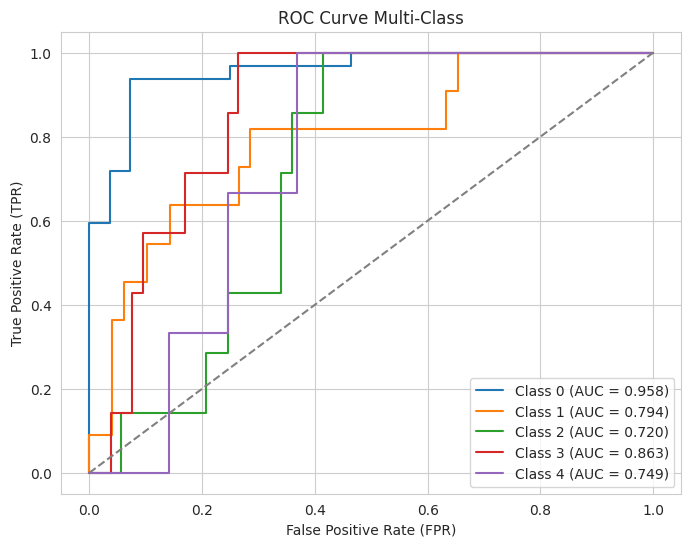

In [11]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report

# Melakukan prediksi probabilitas untuk setiap kelas
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

# Binarisasi target untuk multi-class ROC
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average="macro")
recall_macro = recall_score(y_test, y_pred, average="macro")
f1_macro = f1_score(y_test, y_pred, average="macro")
auc_multi = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovo')

# Menampilkan hasil evaluasi
print(f"Akurasi: {accuracy:.3f}")
print(f"Presisi (Macro): {precision_macro:.3f}")
print(f"Recall (Macro): {recall_macro:.3f}")
print(f"F1-Score (Macro): {f1_macro:.3f}")
print(f"AUC Multi-Class: {auc_multi:.3f}")

# Menampilkan laporan klasifikasi lengkap
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# Plot ROC Curve untuk setiap kelas
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f"Class {classes[i]} (AUC = {roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i]):.3f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Multi-Class")
plt.legend()
plt.show()
